<a href="https://colab.research.google.com/github/Karansingh-25/Tensorflow/blob/main/03_Computer_Vision_CNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Visionn using TensorFlow

Practise of writing algorithms that can discover pattern in visual data.

eg. Camera of a self driving car

## Food 101 Dataset Link
`http://kaggle.com/datasets/dansbecker/food-101`

## Modified Dataset Link to use only 2 classes Pizza and Steak
`https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip`


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-29 10:16:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   172MB/s    in 0.6s    

2025-03-29 10:16:44 (172 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect The Data

Crucial step of computer vision is Visualizing many samples of Data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

#walk thorugh directory
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [6]:
# Another way to find out no. of images in the file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## To visualize the images let's get class name programmatically

In [7]:
# get the class name programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    """
    Generates Random images
     """
    #setup the target directory
    target_folder=target_dir+target_class
    #get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    #read the image and plot it using matplotlib
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

['2989328.jpg']
Image shape: (384, 512, 3)


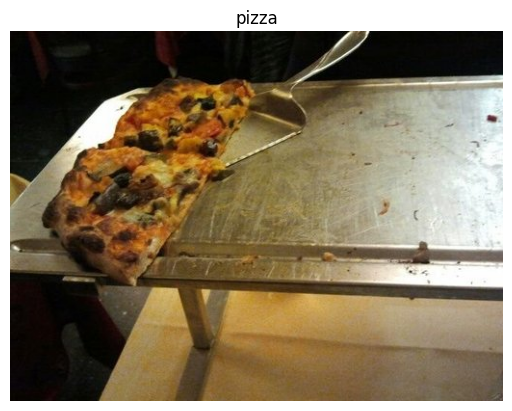

In [9]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

## An end to end Example

Let's build CNN to find patterns in our images


*   load images
*   preprosses the images
*   build CNN to find patterns

*   compile CNN
*   fit the CNN to our training data





In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprosses the data (all pixel values between 0 and 1, Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# data paths
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# Import Data from directories

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)
# Build Architecture (Same as Tiny VGG )
# 1.
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# 3.
history_1=model_1.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))  # flow_from_directory automatically creates data labels


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.6149 - loss: 0.6447 - val_accuracy: 0.7980 - val_loss: 0.4651
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.7699 - loss: 0.5070 - val_accuracy: 0.8200 - val_loss: 0.4182
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.7890 - loss: 0.4558 - val_accuracy: 0.8260 - val_loss: 0.3871
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.8043 - loss: 0.4479 - val_accuracy: 0.8300 - val_loss: 0.4007
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8127 - loss: 0.4201 - val_accuracy: 0.8500 - val_loss: 0.3724


In [11]:
len(train_data)

47

In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using a Non-CNN Model on same dataset

In [13]:
tf.random.set_seed(42)

# 1.
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2.
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3.
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.5160 - loss: 1.3540 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.4955 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.4903 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.4733 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.4837 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


In [14]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

## Tweak the previous Model

In [15]:
tf.random.set_seed(42)

# 1.
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2.
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3.
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.5793 - loss: 5.6554 - val_accuracy: 0.5460 - val_loss: 1.1818
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6751 - loss: 1.0057 - val_accuracy: 0.5540 - val_loss: 1.6458
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.6740 - loss: 1.2449 - val_accuracy: 0.6780 - val_loss: 0.6282
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7682 - loss: 0.4967 - val_accuracy: 0.7860 - val_loss: 0.4724
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.7670 - loss: 0.5545 - val_accuracy: 0.7900 - val_loss: 0.4366


In [16]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Break it down


*   Become ne with data (Visualize,visualize,visualize)
*   Preprocess the data (Scaling/Normalizing and turning data into batches)
*   Build the model
*   Fit the model
*   Evaluate the Model
*   Adjust different parameters and adjust the model
*   Repeat untill satisfied



### 1. Become one with data

['438871.jpg']
Image shape: (512, 512, 3)
['2301105.jpg']
Image shape: (384, 512, 3)


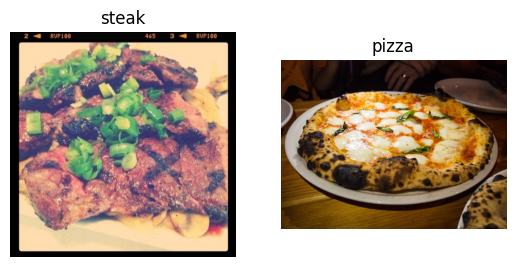

In [17]:
# Visualize Data
plt.figure
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data

In [18]:
# test/train split
test_dir="pizza_steak/test/"
train_dir="pizza_steak/train/"

Our next step is to turn data into **Batches**

**Batches** - A small subset of teh data. Instead of looking all images at one time divide the data into batch and look into it. A model might look only 32 at a time

It does for couple of reason


1.   10,000 (or more) samples might not fit into memory of processor
2.   Trying to learn large samples could result in the model not being abel to learn very well.



In [19]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [20]:
# Load in image data from directories and change them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# get a sample of train data batch
images,labels=next(train_data)  # Get the "next" batch images/labels
len(images),len(labels)

(32, 32)

In [22]:
# Get the first 2 images
images[:2],images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

### 3. Create a CNN Model (Baseline Model)

In [23]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation
from tensorflow.keras import Sequential

In [24]:
# Create the Model (Base line Convolutional Neural Network)
model_4=Sequential([
    Conv2D(filters=10, # No. of zsliding window going across an input (higher=more complex model )
           kernel_size=3, #Size of sliding window going across input
           strides=1, #Size of step is the sliding window takes
           padding="valid",  # if "same" then output shape = input shape if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [25]:
# Comiple the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

###4.  Fit the Model

In [27]:
# Check the length of training and test data
len(train_data),len(test_data)

(47, 16)

In [28]:
# Fit the model
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.5167 - loss: 2.5247 - val_accuracy: 0.7300 - val_loss: 0.5619
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.7518 - loss: 0.5241 - val_accuracy: 0.8420 - val_loss: 0.4016
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8171 - loss: 0.4298 - val_accuracy: 0.8240 - val_loss: 0.4106
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8538 - loss: 0.3677 - val_accuracy: 0.8260 - val_loss: 0.3974
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.9144 - loss: 0.2744 - val_accuracy: 0.7700 - val_loss: 0.4682


### 5. Evaluate

<Axes: >

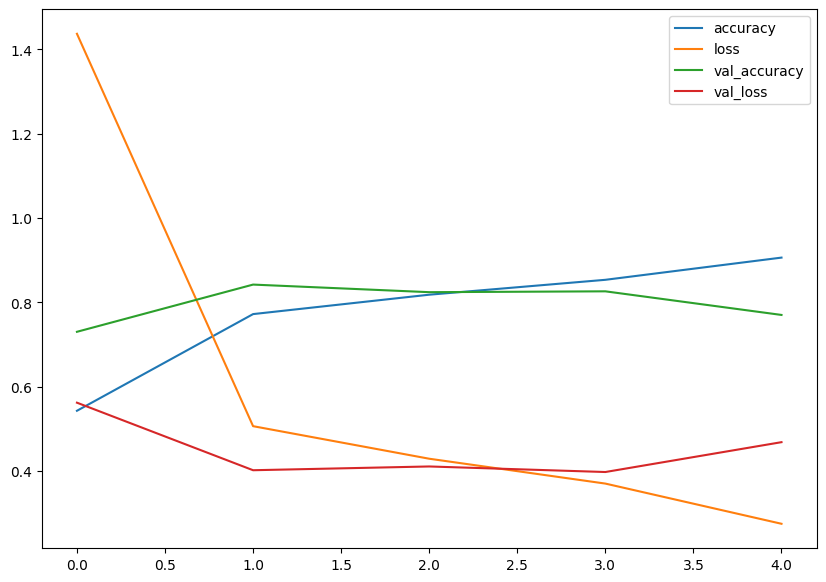

In [29]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [30]:
# plot validation and training curve
def plot_loss_curves(history):
    """
    Return seperate loss curves for training and validation
    """

    loss=history.history["loss"]
    val_loss=history.history["val_loss"]
    accuracy=history.history["accuracy"]
    val_accuracy=history.history["val_accuracy"]

    epochs=range(len(history.history["loss"]))  #How many epochs did we run for?

    #plot loss
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    #plot accuracy
    plt.figure()  #plots new figure
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

> 🔑 **Note** - When a *`Validation loss Starts Increasing`* It is likely that the model is *`Overfitting`* ( Learning the patterns in the dataset too well ) the dataset.
Overfitting *Vanishes* the Model's ability to generalize the *Unseen data*

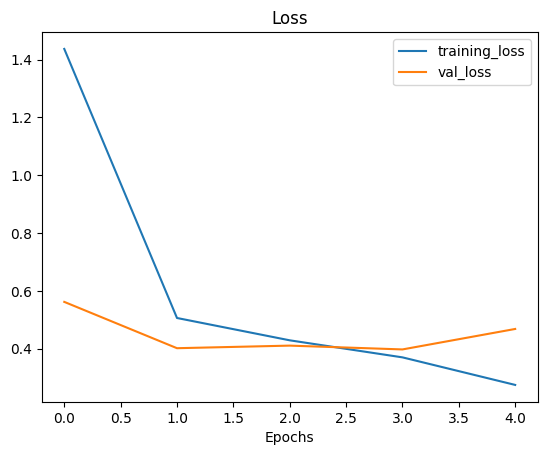

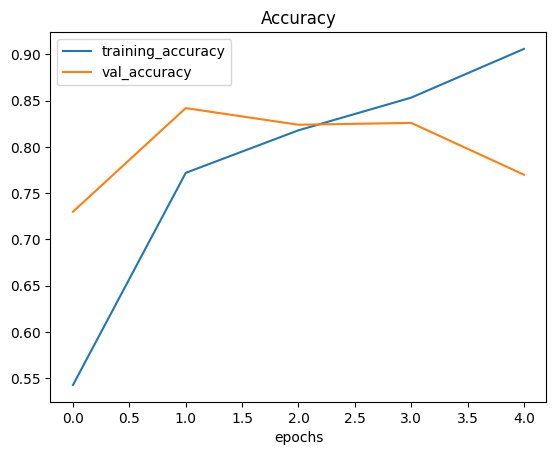

In [31]:
# check loss and accuracy
plot_loss_curves(history_4)

### 6. Adjust the model parameter

1.   Create baseline model
2.   Beat baseline by overfitting
3.   Reduce the Overfitting

Ways to Induce overfitting:


*   Increase no. of conv layers
*   Increase the no. of filters in conv layers
*   Add another dense layer to the output of our flattened layer

Reduce:

* Add data Augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

> 🔑 Reducing Overfitting is also known as regularization


In [32]:
# create the model
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [34]:
# Fit the Model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.5482 - loss: 0.6844 - val_accuracy: 0.7820 - val_loss: 0.5240
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7809 - loss: 0.4993 - val_accuracy: 0.8200 - val_loss: 0.3875
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7975 - loss: 0.4495 - val_accuracy: 0.8300 - val_loss: 0.3707
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8337 - loss: 0.3945 - val_accuracy: 0.8540 - val_loss: 0.3658
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8265 - loss: 0.4013 - val_accuracy: 0.8600 - val_loss: 0.3463


In [35]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

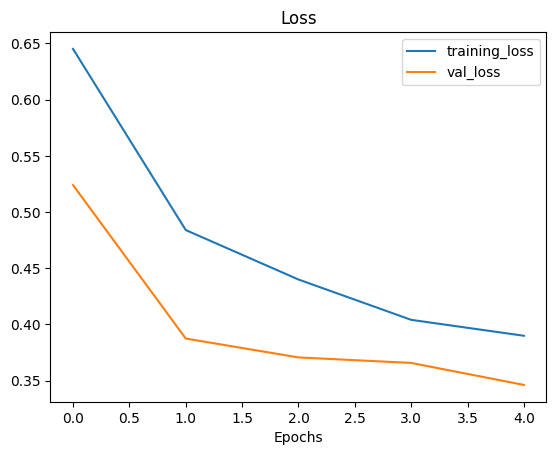

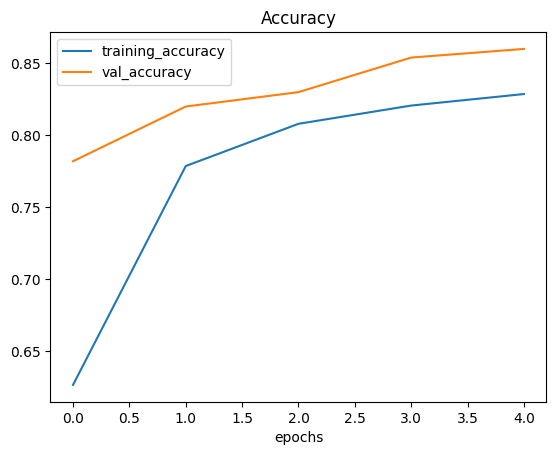

In [36]:
#plot loss curves
plot_loss_curves(history_5)

### Finding Data Augmentation



In [37]:
# Create ImageDataGenerator Instance with Data Augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for test data
test_datagen=ImageDataGenerator(rescale=1/255.)


> 🔑 `Data Augmentation` is the process of altering our training data, leading it to have more diversity and in turn allowing  our models to learn more generalizable patterns.

> `Altering` means adjusting the rotation of image,flipping it, cropping it or something similar

In [38]:
# Import data and augment it from training directory
print("Augmented data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)

#create non augmented train data
print("Non Augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

# non augmented test data
print("non augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Augmented data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


> 🔑 `Data Augmentation` is usually performed only on training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but modified as they loaded into the model.

Let's Visualize some Augmented Data

In [39]:
# Get sample data batches
images,labels=next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)

Showing image no. 5 :


Text(0.5, 1.0, 'Augmented Image')

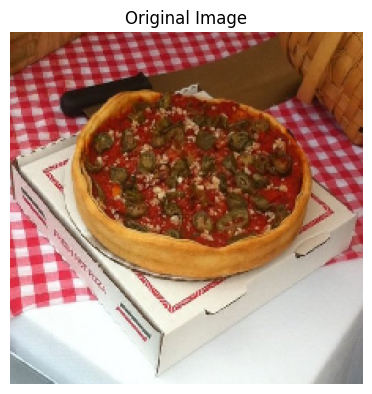

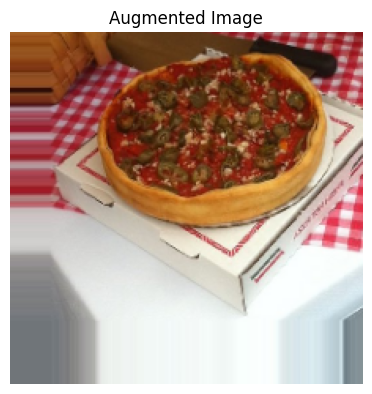

In [40]:
# Show original and augmented images
import random
random_number=random.randint(0,32)   #Batch Size is 32
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
print(f"Showing image no. {random_number} :")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)

plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")

### Model with Augmented Training Data and Unshuffeled

In [41]:
# 1. Create The Model
model_6=Sequential([
    Conv2D(10,3,activation="relu",
           input_shape=(224,224,3),
           padding="valid",
           strides=1),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 412ms/step - accuracy: 0.5205 - loss: 0.7186 - val_accuracy: 0.5500 - val_loss: 0.6866
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - accuracy: 0.5534 - loss: 0.6917 - val_accuracy: 0.6400 - val_loss: 0.6633
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 395ms/step - accuracy: 0.6210 - loss: 0.7013 - val_accuracy: 0.6580 - val_loss: 0.6797
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.5383 - loss: 0.6943 - val_accuracy: 0.6460 - val_loss: 0.6584
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.5969 - loss: 0.6807 - val_accuracy: 0.6880 - val_loss: 0.6203


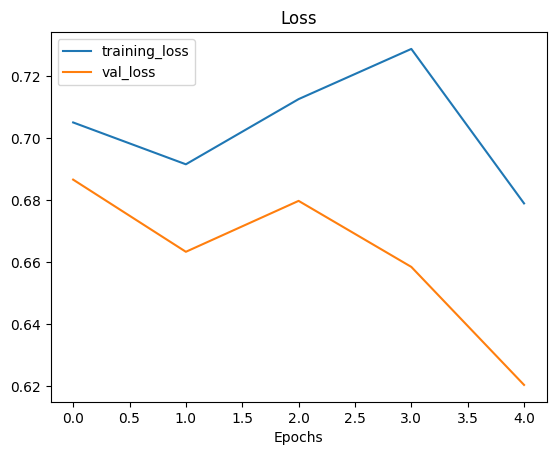

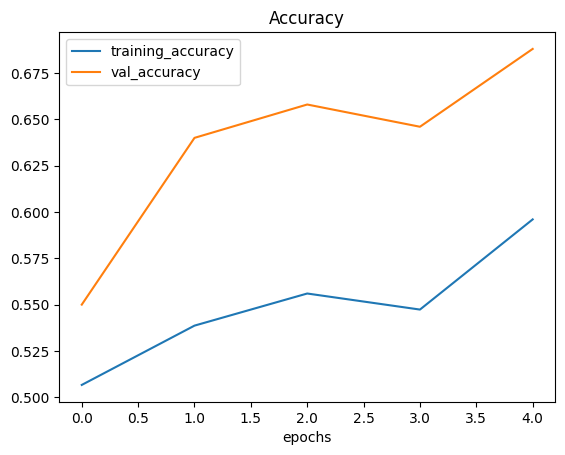

In [42]:
plot_loss_curves(history_6)

In [43]:
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

### Model with Augmented Training Data and Shuffeled

In [44]:
#import the data, Augment and Shuffle fromc training directory

train_data_augmented_shuffeled=train_datagen_augmented.flow_from_directory(train_dir,
 target_size=(224,224),
 class_mode="binary",
 shuffle=True)


Found 1500 images belonging to 2 classes.


In [45]:
model_7=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_7=model_7.fit(train_data_augmented_shuffeled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffeled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 0.5150 - loss: 0.6819 - val_accuracy: 0.7760 - val_loss: 0.5139
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.7303 - loss: 0.5451 - val_accuracy: 0.8480 - val_loss: 0.3628
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - accuracy: 0.7588 - loss: 0.4929 - val_accuracy: 0.8480 - val_loss: 0.3868
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - accuracy: 0.7820 - loss: 0.4791 - val_accuracy: 0.8500 - val_loss: 0.3631
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.7541 - loss: 0.5061 - val_accuracy: 0.8220 - val_loss: 0.3991


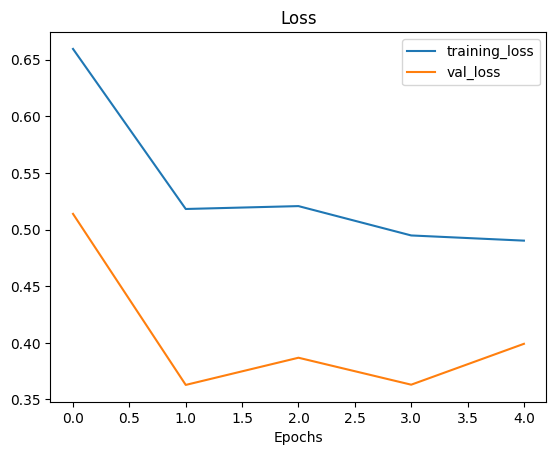

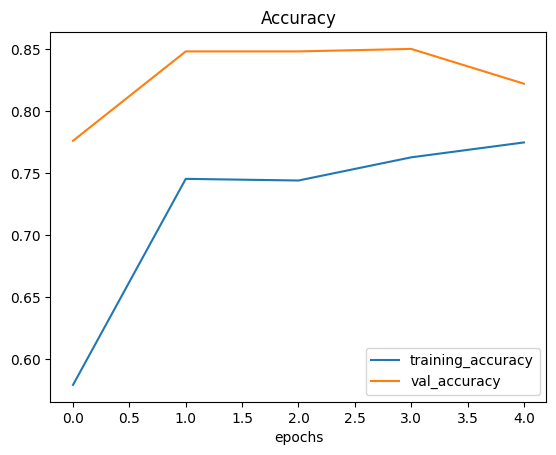

In [46]:
# Plot Loss Curves
plot_loss_curves(history_7)

In [47]:
model_7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

### 7. Repeat Untill Satisfied

Steps to improve the Model

*   Increase the no. of layers (add more `Conv2D` / `MaxPool2D` layers)
*   Increase the no. of filters (from 10 to 32 or even 64)
*   Train for longer
*   Find an Ideal Learning Rate
*   Get More Data
*   Use `Transfer learning`

## Making a prediction with our trained model on our own custom Data

In [48]:
print(class_names)

['pizza' 'steak']


--2025-03-29 10:25:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-03-29 10:25:02 (40.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

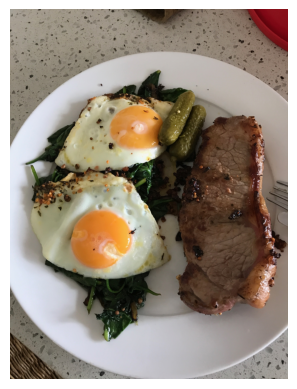

In [49]:
# view example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [50]:
# Check the shape
steak.shape

(4032, 3024, 3)

In [51]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [52]:
# can we pass steak as it is to the model
model_7.predict(expanded_steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_11" is incompatible with the layer: expected axis -1 of input shape to have value 6760, but received input with shape (1, 1887520)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 4032, 3024, 3), dtype=uint8)
  • training=False
  • mask=None

>🔑 **NOTE** - When you train a neural network and want to predict it on your custom data make sure your custom data (new data) is processed into the same format as the data your model was trained on

In [53]:
# Create a function to import image and resize it to be able to be used with our Model
def load_prep_image(filename,img_shape=224):
  """
  Read image from filename, and turns into a tensor and reshapes into (img_shape,img_shape,color_channels)
  """
  # Read in the Image
  img=tf.io.read_file(filename)
  # Decode the image into Tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image
  img=img/255.
  return img

In [54]:
# load in and preprocess our custom image
steak=load_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [55]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


array([[0.92001003]], dtype=float32)

In [56]:
# index the predicted class
pred_class=class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [57]:
def pred_plot(model,filename,class_names=class_names):
  """
  Import an image located at filename and makes a prediction and plots the image with predicted class as title
  """
  #import the target image
  img=load_prep_image(filename)
  # make prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  # get predicted class
  pred_class=class_names[int(tf.round(pred))]
  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


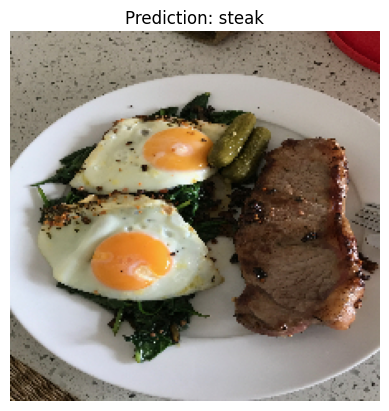

In [58]:
# Test our model on custom image
pred_plot(model_7,"03-steak.jpeg")

## Our Model Works !! Let's try on another Custom Image

--2025-03-29 10:25:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-03-29 10:25:33 (60.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


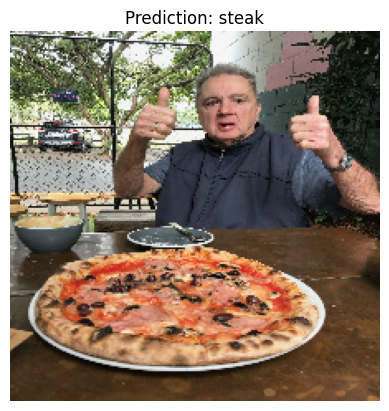

In [59]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pred_plot(model_7,"03-pizza-dad.jpeg")

# MutliClass Image Classification

10 Classes in This Case

1. Become one with data
2. Preprocess the data
3. Create a Model (Baseline)
4. Fit the Model (overfit to make sure it works)
5. Evaluate the Model
6. Adjust the different Hyperparameter and improve the Model (Reduce overfitting and Beat Baseline)
7. Repeat untill Satisfied


## 1. Become one with the Data

In [60]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-29 10:25:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  63.6MB/s    in 5.5s    

2025-03-29 10:25:40 (89.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
import os
 #Walk through 10 classes of data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} Directories and {len(filenames)} files in {dirpath}")

There are 2 Directories and 0 files in 10_food_classes_all_data
There are 10 Directories and 0 files in 10_food_classes_all_data/test
There are 0 Directories and 250 files in 10_food_classes_all_data/test/pizza
There are 0 Directories and 250 files in 10_food_classes_all_data/test/steak
There are 0 Directories and 250 files in 10_food_classes_all_data/test/fried_rice
There are 0 Directories and 250 files in 10_food_classes_all_data/test/hamburger
There are 0 Directories and 250 files in 10_food_classes_all_data/test/chicken_curry
There are 0 Directories and 250 files in 10_food_classes_all_data/test/ice_cream
There are 0 Directories and 250 files in 10_food_classes_all_data/test/ramen
There are 0 Directories and 250 files in 10_food_classes_all_data/test/grilled_salmon
There are 0 Directories and 250 files in 10_food_classes_all_data/test/sushi
There are 0 Directories and 250 files in 10_food_classes_all_data/test/chicken_wings
There are 10 Directories and 0 files in 10_food_classes_al

In [62]:
# Set up train and Test Directory
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [63]:
# Get the class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1421944.jpg']
Image shape: (512, 512, 3)


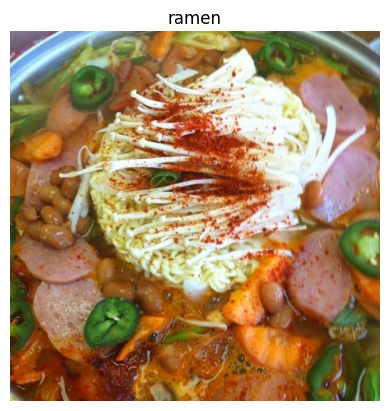

In [64]:
#Visualize Visualize Visualize
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))


## 2. Preprocess The Data

In [65]:
# preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Reascale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# 2. Load data from directory and Divide into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a Baseline CNN Model

Replicate the CNN Explainer Website Model

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam

# Create the Model same as CNN Explainer Website
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

# Compile the model
model_8.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Fit the Model
history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step - accuracy: 0.1660 - loss: 2.3126 - val_accuracy: 0.2492 - val_loss: 2.0424
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.3034 - loss: 1.9712 - val_accuracy: 0.2552 - val_loss: 2.0166
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.4197 - loss: 1.7116 - val_accuracy: 0.2924 - val_loss: 2.0140
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.5859 - loss: 1.2388 - val_accuracy: 0.2768 - val_loss: 2.3230
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.8140 - loss: 0.5867 - val_accuracy: 0.2516 - val_loss: 3.2086


## 5. Evaluate the Model

In [68]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.2485 - loss: 3.2083


[3.2086403369903564, 0.2515999972820282]

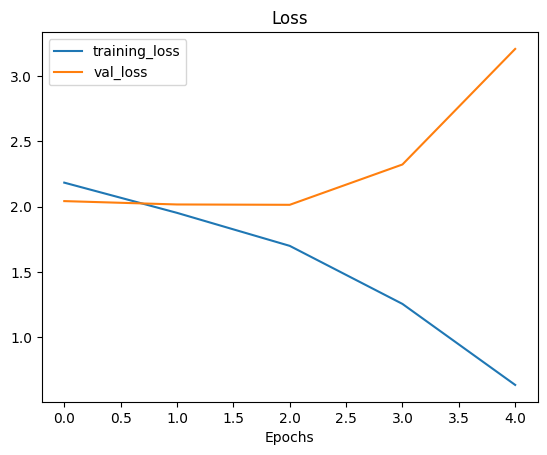

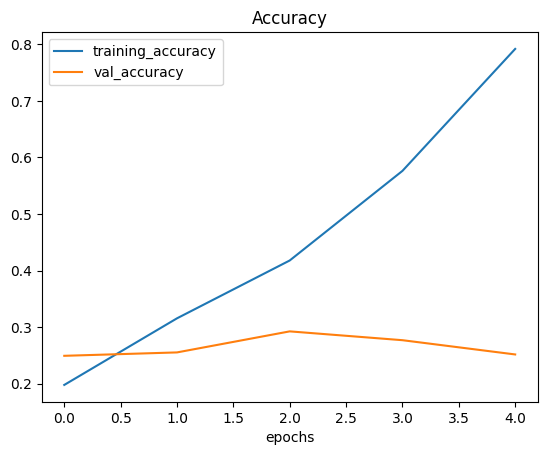

In [69]:
plot_loss_curves(history_8)

The Model is `Overfitting` Very badly on the Training Data.

It is predicting Great on Training Result but not Generalizing well on the Unseen Data

## 6. Adjust the Model Hyperparameter (To Beat the Baseline/Reduce Overfitting)

So, let's try and fix overfitting by...

* **Get more data** having more data gives a model more opportunity to learn diverse patterns...

* **Simplify the model** if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers

* **Use data augmentation** data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)

* **Use transfer learning** transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [70]:
# Let's Try to Simplify the Model First
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [71]:
# Let's Remove 2 Convolutional layers
model_9=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [72]:
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.1872 - loss: 2.4072 - val_accuracy: 0.2504 - val_loss: 2.0777
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.3623 - loss: 1.8733 - val_accuracy: 0.2832 - val_loss: 2.0144
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.5074 - loss: 1.5133 - val_accuracy: 0.2940 - val_loss: 2.0204
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.6660 - loss: 1.0623 - val_accuracy: 0.3024 - val_loss: 2.2221
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.8271 - loss: 0.6116 - val_accuracy: 0.2764 - val_loss: 2.5517


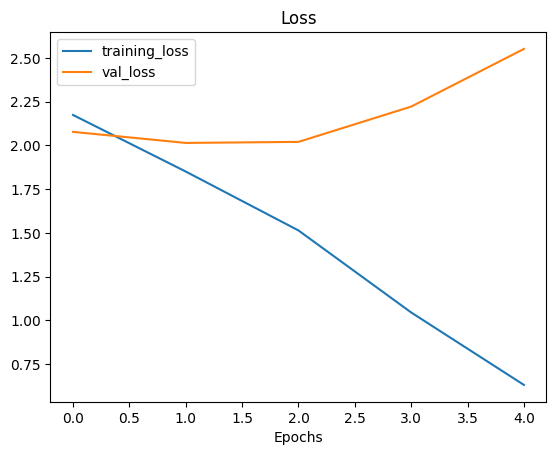

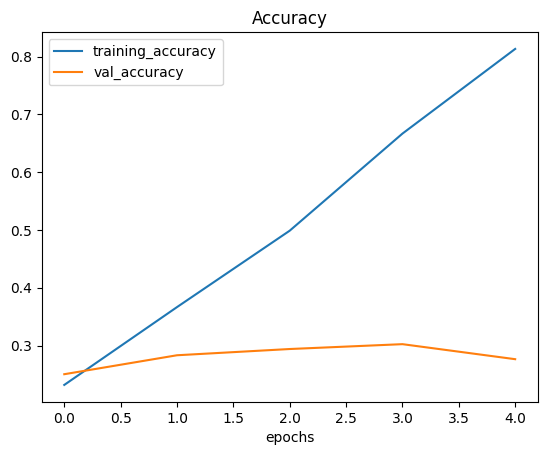

In [73]:
plot_loss_curves(history_9)

Simplifying The Model Experiment didn't work well, Let's try Data Augmentation

## Trying to remove Overfitting with data Augmentation

We want to do -

*   Reduce Overfitting
*   improve Validation Accuracy



In [74]:
# Create Augmented Image DataGenerator
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [75]:
# Let's Create Another model with fitting on Augmented Data

model_10=tf.keras.models.clone_model(model_8)  # Clones the model

# Compile the Cloned Model
model_10.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [76]:
history_10= model_10.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 417ms/step - accuracy: 0.1478 - loss: 2.2570 - val_accuracy: 0.2892 - val_loss: 2.0133
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 418ms/step - accuracy: 0.2438 - loss: 2.0911 - val_accuracy: 0.2940 - val_loss: 1.9700
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 96s 411ms/step - accuracy: 0.2714 - loss: 2.0570 - val_accuracy: 0.2984 - val_loss: 1.9767
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 417ms/step - accuracy: 0.2694 - loss: 2.0348 - val_accuracy: 0.3112 - val_loss: 1.9516
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 96s 411ms/step - accuracy: 0.2864 - loss: 2.0215 - val_accuracy: 0.3448 - val_loss: 1.8693


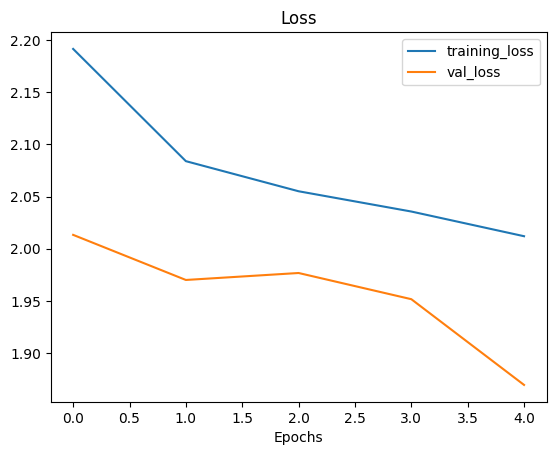

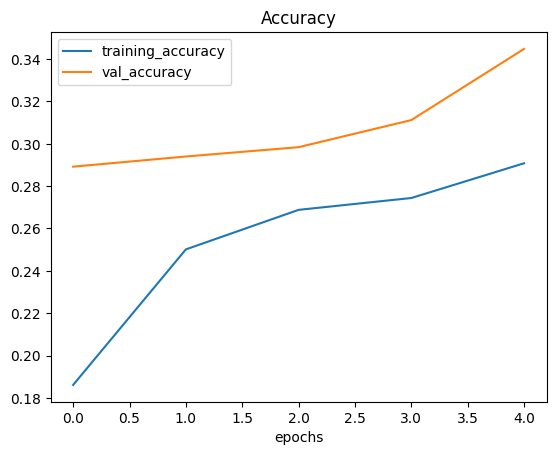

In [77]:
plot_loss_curves(history_10)

## 7. Repeat Untill Satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:

*   Restructuring our model's architecture (increasing layers/hidden units)
*   Adjust the learning rate

*   Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)

*   Training for longer (e.g. 10 epochs instead of 5 epochs)

*   Try **Transfer Learning**

## 8.Making Predictions With Our Model

Let use our Trained Model To make some predictions on our own Custom Images

In [78]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [79]:
# Get Some Custom Data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg

--2025-03-29 10:41:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2025-03-29 10:41:11 (68.9 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2025-03-29 10:41:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP requ

In [80]:
# Make a prediction using model_10
pred_plot(model=model_10,
          filename="03-hamburger.jpeg",
          class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


TypeError: only length-1 arrays can be converted to Python scalars

> 🔑 Previous pred_plot works only with `Binary Class`. Reconfig pred_plot function to work with MultiClass



In [81]:
def pred_plot_multi(model,filename,class_names=class_names):
  """
  Import an image located at filename and makes a prediction and plots the image with predicted class as title
  """
  #import the target image
  img=load_prep_image(filename)
  # make prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Add in logic for multi-class as well as binary class
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


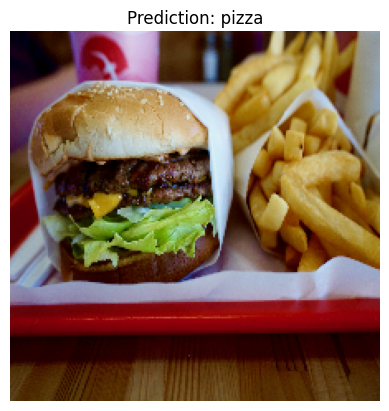

In [82]:
pred_plot_multi(model=model_10,
                filename="03-hamburger.jpeg",
                class_names=class_names)

## 9. Save and load the Model

In [87]:
# Save a model
model_10.save("model_10_saved.h5")

In [89]:
loaded_model_10=tf.keras.models.load_model("model_10_saved.h5")
loaded_model_10

<Sequential name=sequential_7, built=True>

In [90]:
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.3430 - loss: 1.8872


[1.8693150281906128, 0.3447999954223633]

In [91]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.3411 - loss: 1.8864


[1.8693150281906128, 0.3447999954223633]